# Merge Tree Dummy Plotting Notebook

In [131]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [108]:
# classes from main notebook

class Merger:
    def __init__(self, merger_info):
        self.time = merger_info[1]
        self.old_component = merger_info[2]
        self.new_component = merger_info[3]
    
    
class StaticSublattice:
    def __init__(self, sublattice, time):
        self.time = time
        self.component = sublattice.component
        self.basis_list = sublattice.basis_list
        self.basis_matrix = sublattice.basis_matrix # basis unscaled (crossing vectors)
        self.dim = len(sublattice.basis_list)
        self.det_abs = sublattice.det_abs
        self.det_rel = sublattice.det_rel
        
        
        

In [156]:
comp0 = [Merger([True, 8, 2, 0]),
         Merger([True, 9, 1, 0]),
         Merger([True, 9+2, 0, 0])
         ]
# last merge needs to be added for algorithm to be simplified

comp1 = [Merger([True, 6, 3, 1]),
         Merger([True, 9, 1, 0])]

comp2 = [Merger([True, 4, 5, 2]),
         Merger([True, 8, 2, 0])]

comp3 = [Merger([True, 3, 4, 3]),
         Merger([True, 6, 3, 1])]

comp4 = [Merger([True, 2, 6, 4]),
         Merger([True, 3, 4, 3])]

comp5 = [Merger([True, 1, 7, 5]),
         Merger([True, 4, 5, 2])]

comp6 = [Merger([True, 2, 6, 4])]

comp7 = [Merger([True, 1, 7, 5])]

dummy_data = [comp0, comp1, comp2, comp3, comp4, comp5, comp6, comp7]


In [157]:
class MergeOrder:
    def __init__(self, data):
        self.data_static = deepcopy(data)
        self.data = deepcopy(data)
        self.R = [] # list of ordered indices
        self.current_branch_index = 0
        self.current_branch = self.data[0]
        
    def set_branch(self, index):
        self.current_branch_index = index
        self.current_branch = self.data[self.current_branch_index]
        
    def generate_order(self):
        self.data = deepcopy(self.data_static)
        self.set_branch(0)
        
        self.iterator()
        return self.R
    
    def iterator(self):
        #print()
        #print("current branch", self.current_branch_index)
        merger_list = self.current_branch[:-1]
        if len(merger_list) == 0:
            self.R.append(self.current_branch_index)
            #print("R:",self.R)
            
            if self.current_branch_index != 0:
                mother_index = self.current_branch[-1].new_component
                #print(f"reached end of branch, switch to next branch on mother branch {mother_index}")
                self.data[mother_index].pop(-2)
                self.set_branch(mother_index)
                self.iterator()
        else:
            #print("go deeper")
            new_branch_index = merger_list[-1].old_component
            #print("new branch index",new_branch_index)
            self.set_branch(new_branch_index)
            self.iterator()

In [158]:
test = MergeOrder(dummy_data)
#print(test.data_static[4])
#print(dummy_data[4])
test.generate_order()

[6, 4, 3, 1, 7, 5, 2, 0]

In [169]:
def plot_mergetree(data):
    fig, ax = plt.subplots()
    order = MergeOrder(data).generate_order()
    N = len(order)
    
    # create plot with vertical lines of correct lengths
    ax.set_ylabel("time steps (integer)") # for now everything in integer time steps
    ax.set_xlabel("component") 
    ax.set_xticks([i for i in range(N)])
    ax.set_xticklabels([str(comp) for comp in order])
    
    [ax.spines[edge].set_visible(False) for edge in ['top', 'bottom', 'right', 'left']]
    for component in range(N):
        x1 = order.index(component)
        x2 = order.index(data[component][-1].new_component)
        age = data[component][-1].time
        ax.plot([x1, x1], [0, age], "black")
        ax.plot([x1, x2], [age, age], "black")

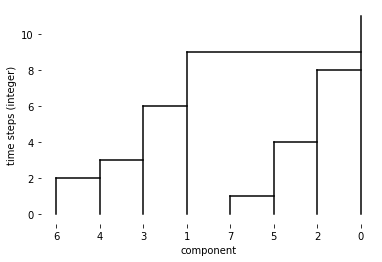

In [170]:
plot_mergetree(dummy_data)

## To do

- **Data Cleaning Pipeline**  
We get the data from our Lambda evolution blabla function which also contains sublattice objects, and does not contain the final "infinite" element on the 0 component which we need for the algorithm to work.

- **Dimension and Coefficient**  
Use the information from the sublattice objects to change the color (greyscale) of the graph, as well as the thickness of the lines. Btw, which one is which, again?

- **Proportion**  
Adjust the x- and y-scaling of the plot so that it is not as squished, or that a user input can be given to choose the squishyness.